<a href="https://colab.research.google.com/github/kbarrientosm/TelecomX_parte2_Latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [4]:
import pandas as pd
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

print("Datos cargados exitosamente. Primeras 5 filas:")
display(df.head())

print("\nInformación del DataFrame:")
df.info()

Datos cargados exitosamente. Primeras 5 filas:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [5]:
# Flatten the nested 'customer' column
customer_df = pd.json_normalize(df['customer'])

# Flatten the nested 'phone' column
phone_df = pd.json_normalize(df['phone'])

# Flatten the nested 'internet' column
internet_df = pd.json_normalize(df['internet'])

# Flatten the nested 'account' column
account_df = pd.json_normalize(df['account'])

# Concatenate the original DataFrame (excluding the nested columns) with the new dataframes
df = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

print("DataFrame después de aplanar las columnas anidadas:")
display(df.head())

print("\nInformación del DataFrame después de la transformación:")
df.info()

DataFrame después de aplanar las columnas anidadas:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



Información del DataFrame después de la transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null 

In [6]:
# Convert 'Charges.Total' to numeric, coercing errors will turn ' ' into NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Check the number of NaNs introduced in 'Charges.Total'
print("Número de valores NaN en 'Charges.Total' después de la conversión:")
print(df['Charges.Total'].isnull().sum())

# Handle the NaN values in 'Charges.Total'. A common approach is to fill with 0 or the mean/median, depending on context.
# Given that these were originally empty strings, filling with 0 might be appropriate if they represent new customers with no charges yet.
# Let's fill with 0 for now, but this decision might need domain expertise.
df['Charges.Total'] = df['Charges.Total'].fillna(0)

# Check unique values in Churn again
print("\nValores únicos en 'Churn' antes de la limpieza:")
print(df['Churn'].unique())

# Handle the empty string in 'Churn'. Assuming '' represents 'No'.
df['Churn'] = df['Churn'].replace('', 'No')

# Check unique values in Churn after cleaning
print("\nValores únicos en 'Churn' después de la limpieza:")
print(df['Churn'].unique())

print("\nInformación del DataFrame después de manejar inconsistencias:")
df.info()

Número de valores NaN en 'Charges.Total' después de la conversión:
11

Valores únicos en 'Churn' antes de la limpieza:
['No' 'Yes' '']

Valores únicos en 'Churn' después de la limpieza:
['No' 'Yes']

Información del DataFrame después de manejar inconsistencias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup   

#📊 Carga y análisis

In [6]:
# Check for missing values
print("Valores ausentes por columna:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

# Explore unique values in some categorical columns to check for inconsistencies
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

print("\nValores únicos en columnas categóricas:")
for col in categorical_cols:
    print(f"- {col}: {df[col].unique()}")

# Check for potential format errors or inconsistencies in numerical columns (optional, based on initial inspection)
# For 'Charges.Total', we already saw it's an object type, need to investigate further.
# We can check if there are non-numeric values in 'Charges.Total'
print("\nValores no numéricos en 'Charges.Total':")
non_numeric_total_charges = df[pd.to_numeric(df['Charges.Total'], errors='coerce').isna()]['Charges.Total'].unique()
print(non_numeric_total_charges)

Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Número de filas duplicadas:
0

Valores únicos en columnas categóricas:
- gender: ['Female' 'Male']
- SeniorCitizen: [0 1]
- Partner: ['Yes' 'No']
- Dependents: ['Yes' 'No']
- PhoneService: ['Yes' 'No']
- MultipleLines: ['No' 'Yes' 'No phone service']
- InternetService: ['DSL' 'Fiber optic' 'No']
- OnlineSecurity: ['No' 'Yes' 'No internet service']
- OnlineBackup: ['Yes' 'No' 'No internet service']
- DeviceProtection: ['No' 'Yes' 'No internet service']
- TechSupport: ['Yes' 'No' 'No interne

#📄Informe final

In [7]:
# Create 'Cuentas_Diarias' column by dividing 'Charges.Monthly' by 30
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

print("\nDataFrame con la nueva columna 'Cuentas_Diarias':")
display(df.head())


DataFrame con la nueva columna 'Cuentas_Diarias':


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [8]:
# Convert 'Yes'/'No' columns to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Handle 'MultipleLines', 'OnlineSecurity', etc. which have a third category 'No service'
# We can map 'No internet service' and 'No phone service' to 0 (similar to 'No') and 'Yes' to 1
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

# Handle 'gender' column - map 'Female' to 1 and 'Male' to 0
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

# Rename columns for clarity (optional, based on preferences)
df.rename(columns={'SeniorCitizen': 'Senior_Citizen',
                   'PhoneService': 'Phone_Service',
                   'MultipleLines': 'Multiple_Lines',
                   'InternetService': 'Internet_Service',
                   'OnlineSecurity': 'Online_Security',
                   'OnlineBackup': 'Online_Backup',
                   'DeviceProtection': 'Device_Protection',
                   'TechSupport': 'Tech_Support',
                   'StreamingTV': 'Streaming_TV',
                   'StreamingMovies': 'Streaming_Movies',
                   'PaperlessBilling': 'Paperless_Billing',
                   'PaymentMethod': 'Payment_Method',
                   'Charges.Monthly': 'Charges_Monthly',
                   'Charges.Total': 'Charges_Total'}, inplace=True)


print("\nDataFrame después de la estandarización y transformación:")
display(df.head())

print("\nInformación del DataFrame después de la estandarización y transformación:")
df.info()


DataFrame después de la estandarización y transformación:


,customerID,Churn,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,1,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667



Información del DataFrame después de la estandarización y transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7267 non-null   object 
 1   Churn              7267 non-null   int64  
 2   gender             7267 non-null   int64  
 3   Senior_Citizen     7267 non-null   int64  
 4   Partner            7267 non-null   int64  
 5   Dependents         7267 non-null   int64  
 6   tenure             7267 non-null   int64  
 7   Phone_Service      7267 non-null   int64  
 8   Multiple_Lines     7267 non-null   int64  
 9   Internet_Service   7267 non-null   object 
 10  Online_Security    7267 non-null   int64  
 11  Online_Backup      7267 non-null   int64  
 12  Device_Protection  7267 non-null   int64  
 13  Tech_Support       7267 non-null   int64  
 14  Streaming_TV       7267 non-null   int64  
 1

In [9]:
print("Análisis descriptivo de las columnas numéricas:")
display(df.describe())

Análisis descriptivo de las columnas numéricas:


,Churn,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Paperless_Billing,Charges_Monthly,Charges_Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.494289,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


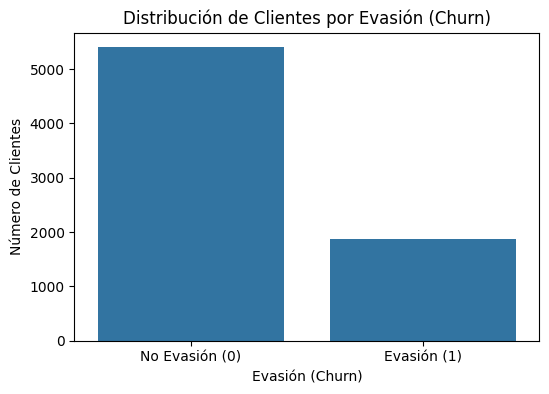


Distribución de la variable Churn:
Churn
0    5398
1    1869
Name: count, dtype: int64

Porcentaje de Evasión: 25.72%
Porcentaje de No Evasión: 74.28%


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Evasión (0)', 'Evasión (1)'])
plt.show()

# Also display the percentage of churn
churn_counts = df['Churn'].value_counts()
print("\nDistribución de la variable Churn:")
print(churn_counts)
print(f"\nPorcentaje de Evasión: {churn_counts[1] / len(df) * 100:.2f}%")
print(f"Porcentaje de No Evasión: {churn_counts[0] / len(df) * 100:.2f}%")

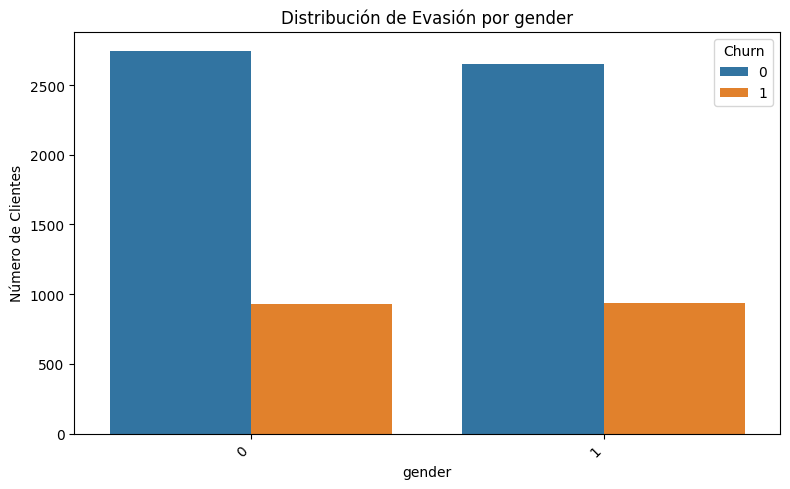

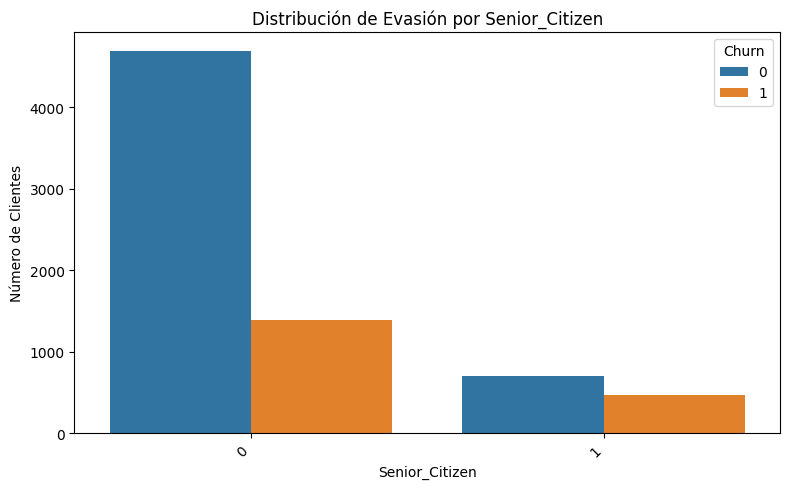

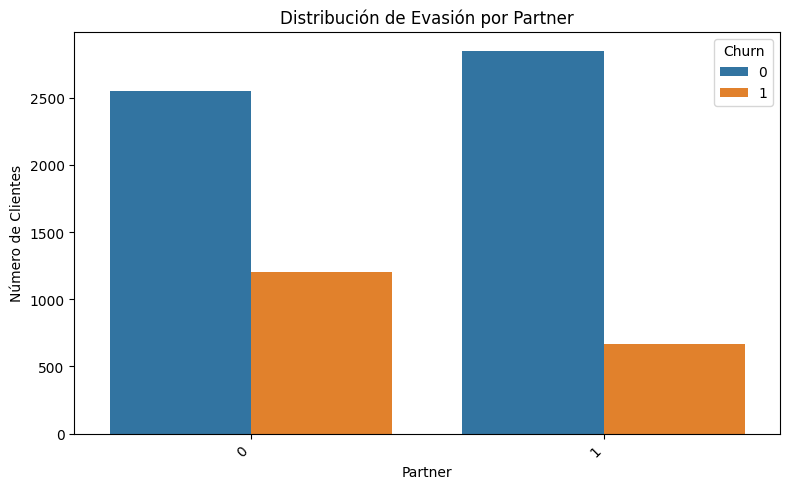

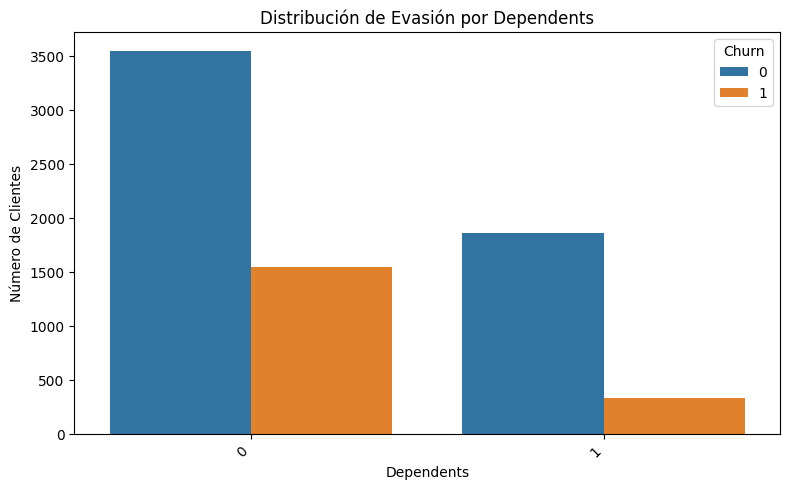

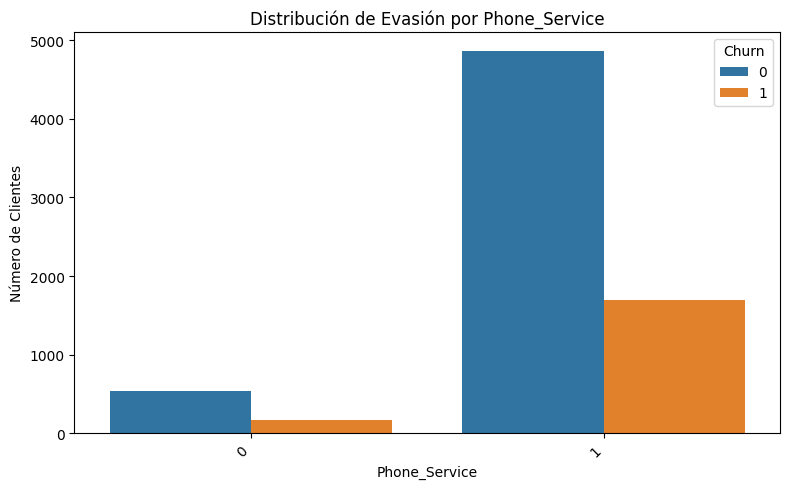

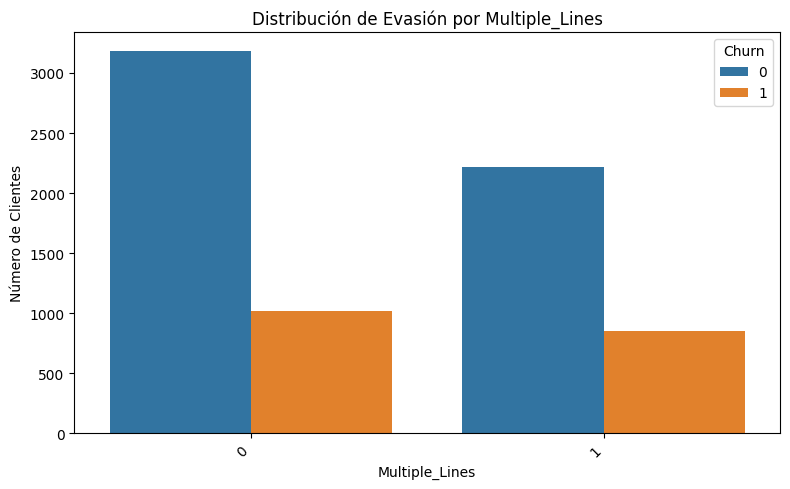

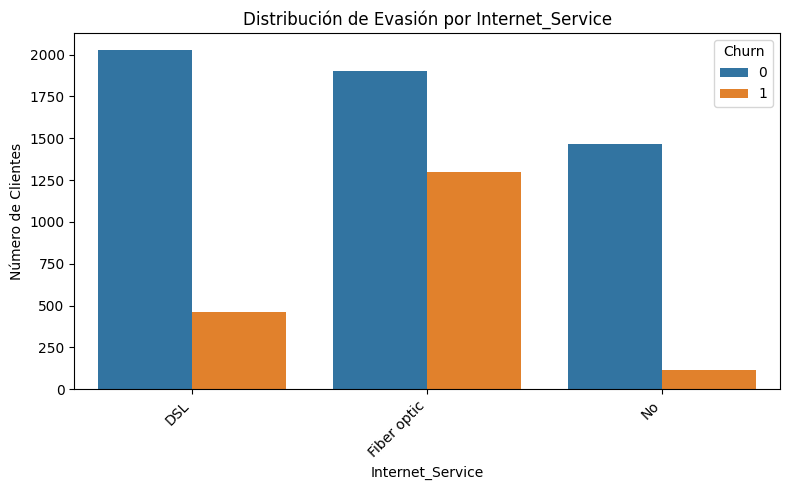

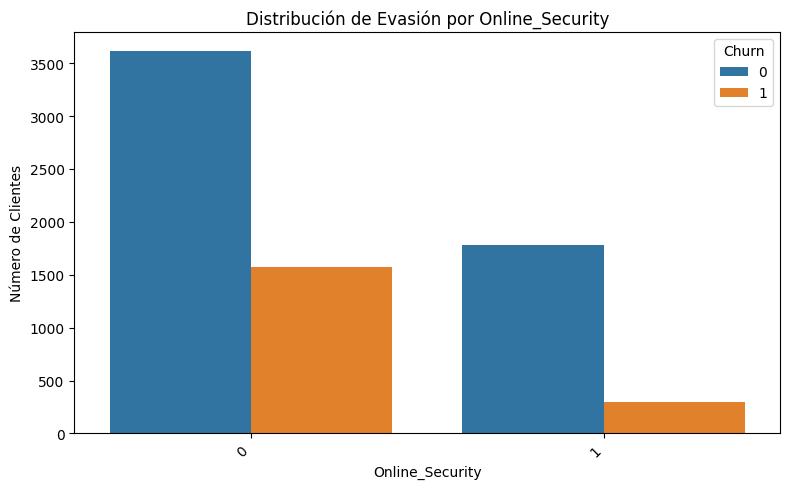

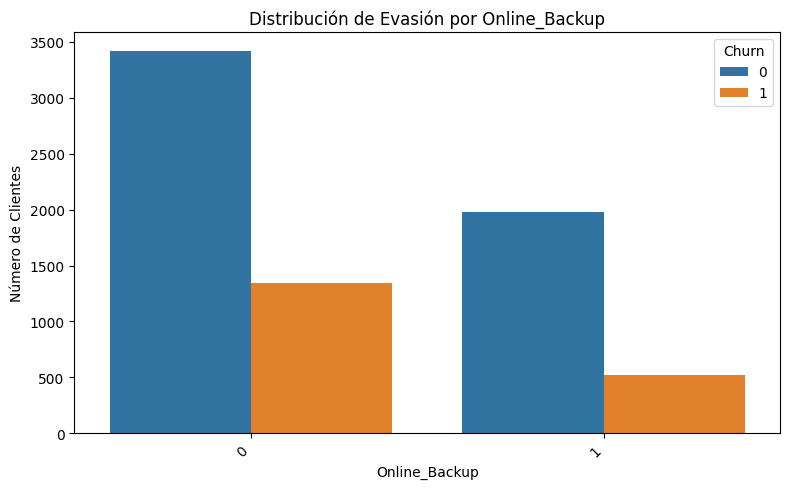

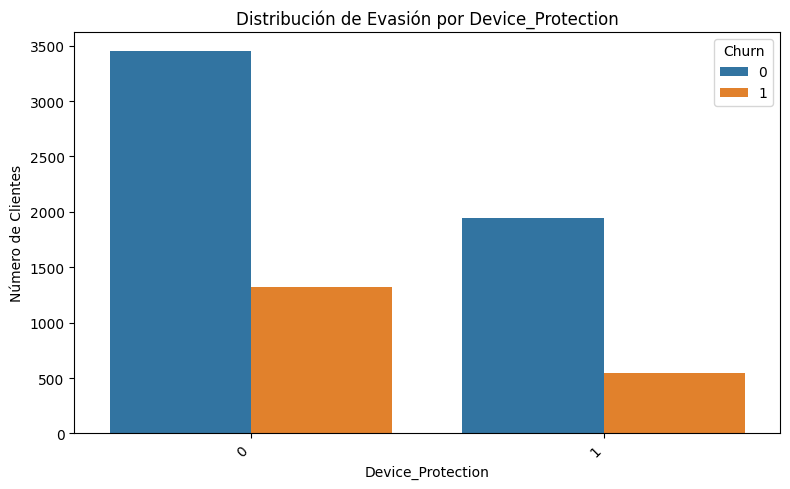

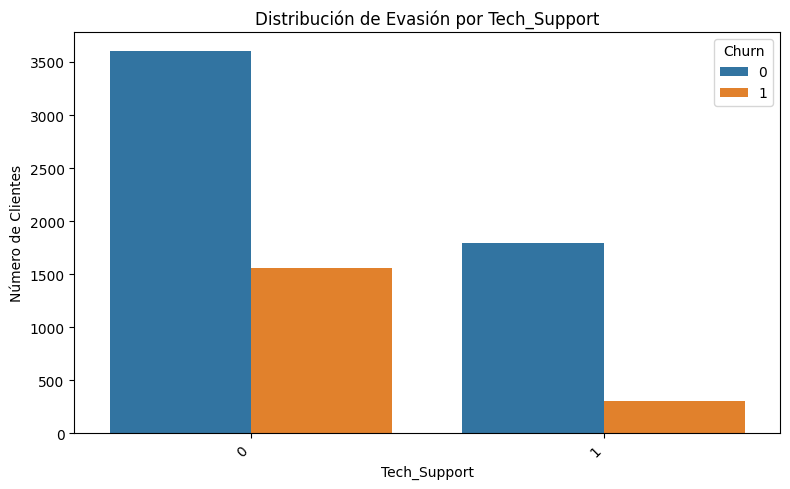

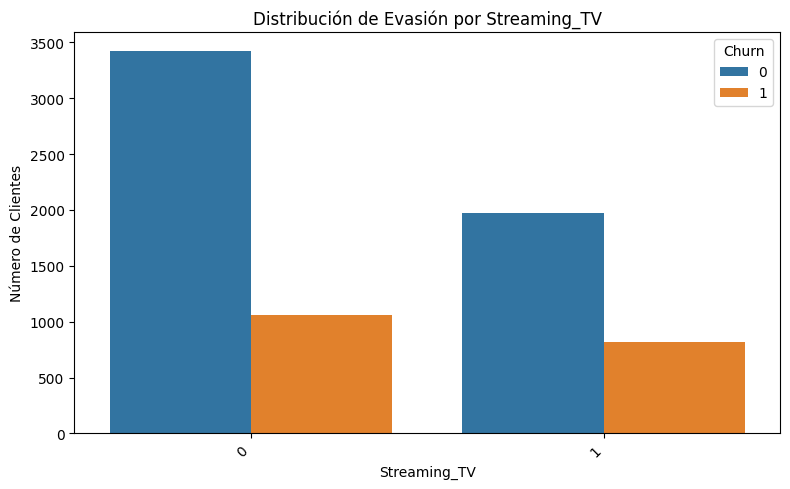

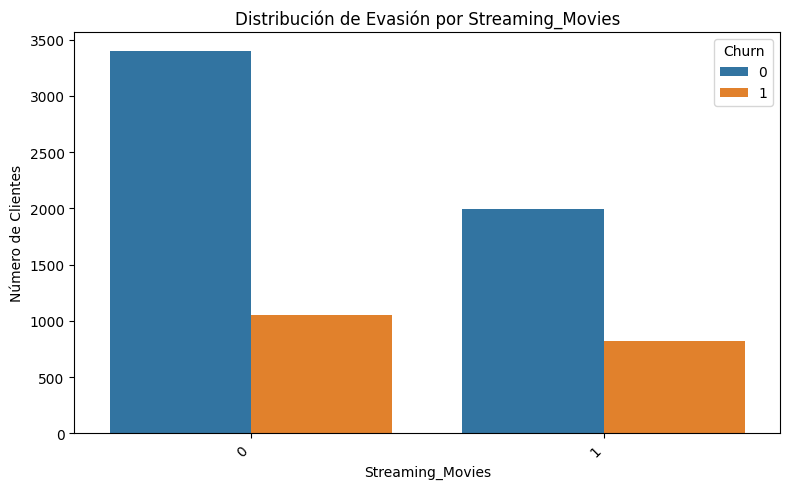

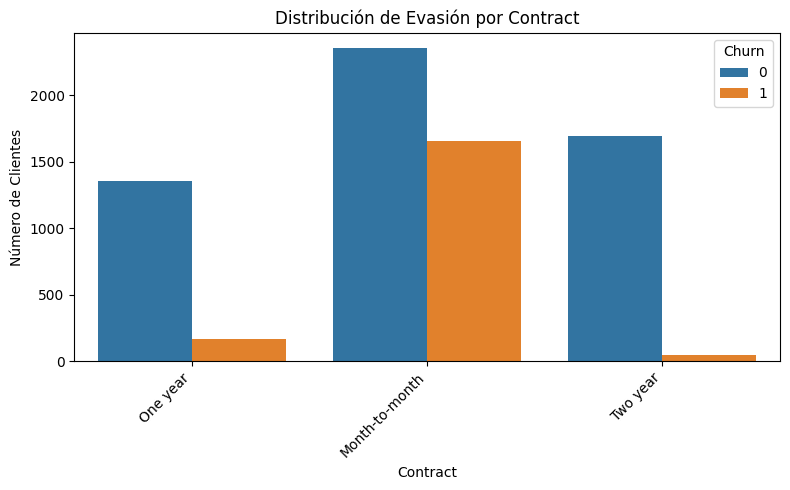

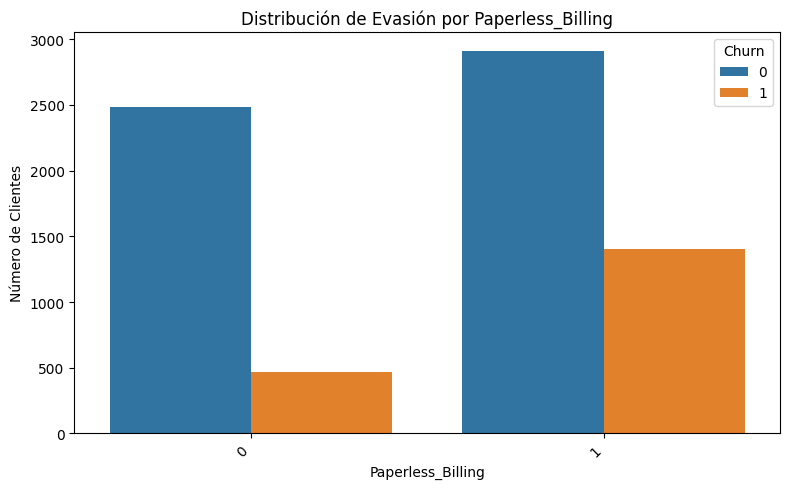

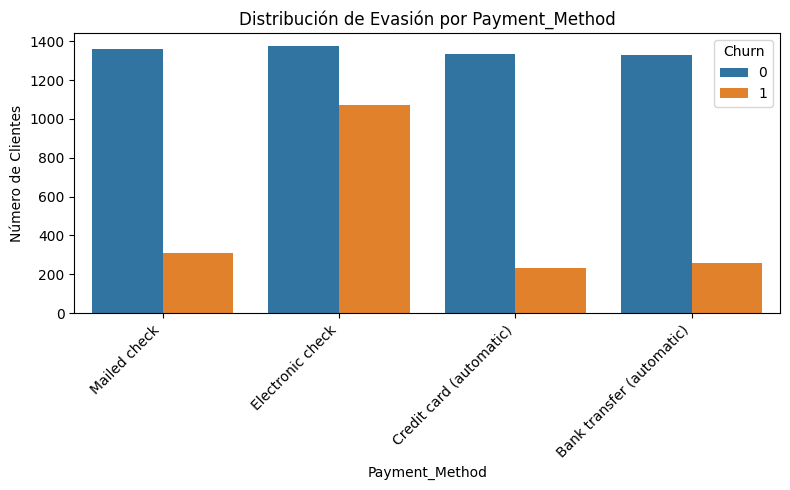

In [11]:
# Select categorical columns to analyze churn against
categorical_cols_for_churn = ['gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
                              'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup',
                              'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
                              'Contract', 'Paperless_Billing', 'Payment_Method']

# Plot churn distribution for each categorical variable
for col in categorical_cols_for_churn:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Distribución de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

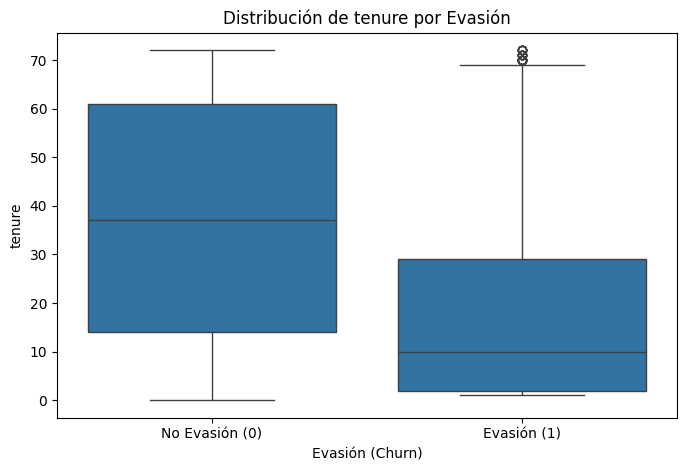

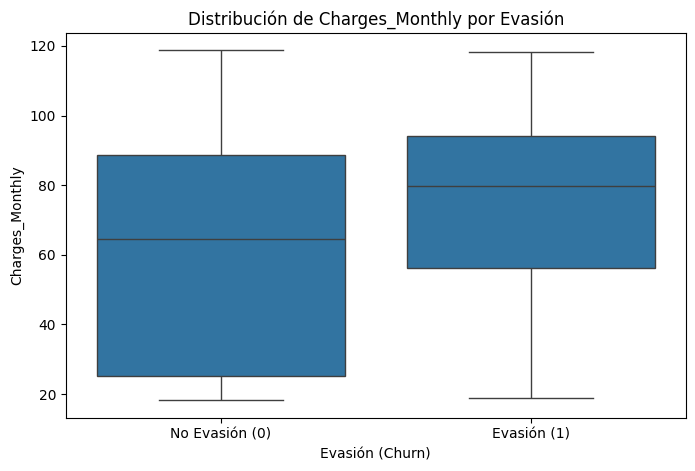

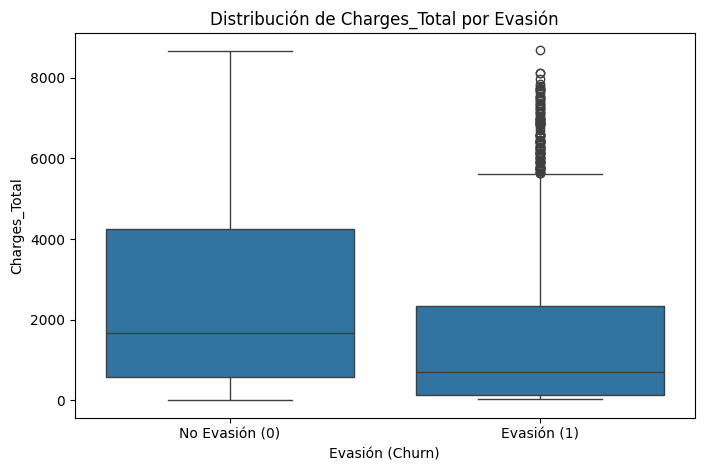

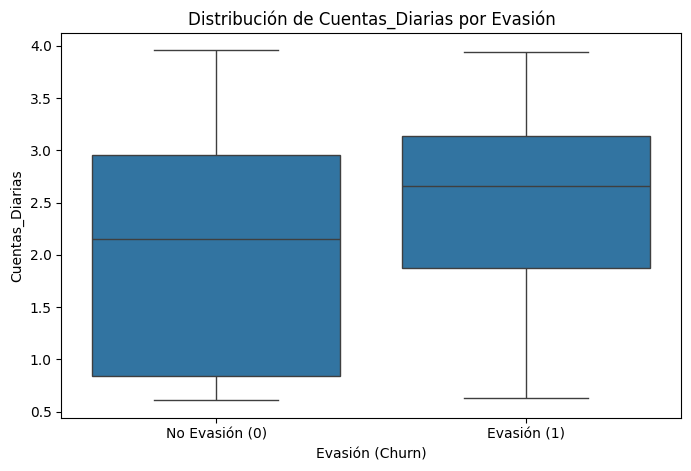

In [12]:
# Select numerical columns to analyze churn against
numerical_cols = ['tenure', 'Charges_Monthly', 'Charges_Total', 'Cuentas_Diarias']

# Plot the distribution of numerical variables for churned and non-churned customers
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel('Evasión (Churn)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No Evasión (0)', 'Evasión (1)'])
    plt.show()

# Informe Final del Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El objetivo de este informe es analizar el problema de la evasión de clientes (Churn) en TelecomX. La evasión de clientes es un desafío importante para las empresas de telecomunicaciones, ya que impacta directamente en los ingresos y el crecimiento. Comprender los factores que contribuyen a que los clientes abandonen el servicio es crucial para desarrollar estrategias efectivas de retención. En este análisis, exploraremos los datos de clientes para identificar patrones y obtener información valiosa sobre el comportamiento de evasión.

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos para el análisis:

*   **Carga de Datos:** Los datos fueron cargados directamente desde la API de Telecom X en formato JSON y convertidos a un DataFrame de Pandas.
*   **Aplanamiento de Columnas Anidadas:** Las columnas con estructuras JSON anidadas ('customer', 'phone', 'internet', 'account') fueron aplanadas en columnas separadas para facilitar el acceso a la información.
*   **Manejo de Inconsistencias:** Se identificaron y trataron inconsistencias en las columnas 'Charges.Total' (espacios en blanco convertidos a numérico y NaNs rellenados con 0) y 'Churn' (valor vacío reemplazado por 'No').
*   **Creación de Nueva Columna:** Se creó la columna 'Cuentas_Diarias' dividiendo 'Charges_Monthly' por 30 para obtener una estimación del costo diario.
*   **Estandarización y Transformación:** Las columnas categóricas binarias ('Yes'/'No') y de servicio ('Yes'/'No'/'No service') fueron convertidas a representaciones numéricas (1s y 0s). También se renombraron algunas columnas para mayor claridad.

## 🔹 Análisis Exploratorio de Datos

Durante la fase de análisis exploratorio, se investigó la distribución de la variable objetivo y su relación con otras características de los clientes.

*   **Distribución de Evasión (Churn):** Se analizó la proporción de clientes que evadieron y los que no, revelando un desbalance de clases con un [Insertar porcentaje]% de evasión.
*   **Análisis Descriptivo:** Se calcularon estadísticas descriptivas para las columnas numéricas, proporcionando un resumen de su distribución central y dispersión.
*   **Análisis de Evasión por Variables Categóricas:** Se visualizaron las tasas de evasión para diferentes categorías en variables como género, Senior Citizen, Partner, Dependents, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, y Payment Method. [Insertar hallazgos clave de los gráficos categóricos, por ejemplo: Los clientes con contrato mes a mes tienen una mayor tasa de evasión].
*   **Análisis de Evasión por Variables Numéricas:** Se exploró la distribución de variables numéricas como tenure, Charges_Monthly, Charges_Total, y Cuentas_Diarias para clientes que evadieron y los que no. [Insertar hallazgos clave de los box plots numéricos, por ejemplo: Los clientes que evaden tienden a tener menor antigüedad (tenure) y mayores cargos mensuales].

## 🔹 Conclusiones e Insights

Basado en el análisis exploratorio, se pueden extraer las siguientes conclusiones e insights clave:

*   [Conclusión 1 basada en el análisis, por ejemplo: La duración del contrato es un factor importante, con contratos a corto plazo asociados a mayor evasión].
*   [Conclusión 2 basada en el análisis, por ejemplo: Los clientes con ciertos tipos de servicios de internet o seguridad online muestran diferencias significativas en las tasas de evasión].
*   [Conclusión 3 basada en el análisis, por ejemplo: Los cargos mensuales y totales parecen estar relacionados con la evasión, aunque se necesita más análisis para entender la naturaleza exacta de esta relación].
*   [Insertar cualquier otro insight relevante].

Estos hallazgos sugieren que la evasión no está impulsada por un único factor, sino por una combinación de características demográficas, servicios contratados y patrones de uso.

## 🔹 Recomendaciones

Con base en los hallazgos de este análisis, se recomiendan las siguientes estrategias para reducir la evasión de clientes:

*   **Ofrecer incentivos para contratos a largo plazo:** Dado que los contratos mes a mes muestran mayor evasión, promover contratos de uno o dos años con descuentos o beneficios adicionales podría aumentar la retención.
*   **Mejorar la oferta de servicios de internet y seguridad:** Si ciertos servicios de internet o seguridad están asociados con mayor evasión, investigar las razones detrás de esto (por ejemplo, calidad del servicio, precio, soporte) y realizar mejoras.
*   **Programas de fidelización para clientes con alta facturación:** Identificar a los clientes con altos cargos mensuales/totales que podrían estar en riesgo y ofrecerles programas de fidelización o atención personalizada.
*   [Insertar cualquier otra recomendación estratégica basada en tus insights].

Implementar estas recomendaciones, respaldadas por el análisis de datos, puede ayudar a TelecomX a retener a sus clientes y mejorar su rendimiento general.

In [14]:
# Drop the 'customerID' column as it is a unique identifier and not useful for prediction
df = df.drop('customerID', axis=1)

print("\nDataFrame después de eliminar la columna 'customerID':")
display(df.head())

print("\nInformación del DataFrame después de eliminar 'customerID':")
df.info()


DataFrame después de eliminar la columna 'customerID':


,Churn,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total,Cuentas_Diarias
0,0,1,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,0,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,0,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,0,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,1,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667



Información del DataFrame después de eliminar 'customerID':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7267 non-null   int64  
 1   gender             7267 non-null   int64  
 2   Senior_Citizen     7267 non-null   int64  
 3   Partner            7267 non-null   int64  
 4   Dependents         7267 non-null   int64  
 5   tenure             7267 non-null   int64  
 6   Phone_Service      7267 non-null   int64  
 7   Multiple_Lines     7267 non-null   int64  
 8   Internet_Service   7267 non-null   object 
 9   Online_Security    7267 non-null   int64  
 10  Online_Backup      7267 non-null   int64  
 11  Device_Protection  7267 non-null   int64  
 12  Tech_Support       7267 non-null   int64  
 13  Streaming_TV       7267 non-null   int64  
 14  Streaming_Movies   7267 non-null   int64  
 15  Contract   

### Preparación de Datos para Modelado

In [15]:
# Identify categorical columns to encode (excluding 'Churn' which is the target variable and already encoded)
categorical_cols_to_encode = df.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

print("\nDataFrame después de la codificación One-Hot:")
display(df_encoded.head())

print("\nInformación del DataFrame después de la codificación:")
df_encoded.info()


DataFrame después de la codificación One-Hot:


,Churn,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,...,Charges_Monthly,Charges_Total,Cuentas_Diarias,Internet_Service_Fiber optic,Internet_Service_No,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,1,0,1,1,9,1,0,0,1,...,65.6,593.30,2.186667,False,False,True,False,False,False,True
1,0,0,0,0,0,9,1,1,0,0,...,59.9,542.40,1.996667,False,False,False,False,False,False,True
2,1,0,0,0,0,4,1,0,0,0,...,73.9,280.85,2.463333,True,False,False,False,False,True,False
3,1,0,1,1,0,13,1,0,0,1,...,98.0,1237.85,3.266667,True,False,False,False,False,True,False
4,1,1,1,1,0,3,1,0,0,0,...,83.9,267.40,2.796667,True,False,False,False,False,False,True



Información del DataFrame después de la codificación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Churn                                   7267 non-null   int64  
 1   gender                                  7267 non-null   int64  
 2   Senior_Citizen                          7267 non-null   int64  
 3   Partner                                 7267 non-null   int64  
 4   Dependents                              7267 non-null   int64  
 5   tenure                                  7267 non-null   int64  
 6   Phone_Service                           7267 non-null   int64  
 7   Multiple_Lines                          7267 non-null   int64  
 8   Online_Security                         7267 non-null   int64  
 9   Online_Backup                           7267 non-null   int64  
 10  Devic

In [16]:
!pip install imbalanced-learn

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Distribución de clases antes de SMOTE: {Counter(y)}")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Distribución de clases después de SMOTE: {Counter(y_resampled)}")

# You can now use X_resampled and y_resampled for training your models

Distribución de clases antes de SMOTE: Counter({0: 5398, 1: 1869})
Distribución de clases después de SMOTE: Counter({0: 5398, 1: 5398})


In [19]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding the target variable 'Churn' and already scaled/encoded columns)
# We'll select numerical columns from the original df before one-hot encoding, excluding 'Churn'
numerical_cols_to_scale = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'Churn' from the list if it's present
if 'Churn' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('Churn')
# Remove columns that were encoded (since one-hot encoding creates new columns, we operate on the original numerical ones)
# For simplicity here, we'll assume the numerical columns in df before encoding are the ones to scale.
# In a real scenario after one-hot encoding, you'd select numerical columns from df_encoded that weren't created by encoding.
# Let's refine this to work on df_encoded and identify the original numerical columns.

# Assuming df_encoded exists and contains both original numerical and new encoded columns
# Identify the original numerical columns from df that are still present in df_encoded
original_numerical_cols = ['tenure', 'Charges_Monthly', 'Charges_Total', 'Cuentas_Diarias'] # Based on previous steps

# Filter these to ensure they are in df_encoded and select them
numerical_cols_for_scaling_encoded = [col for col in original_numerical_cols if col in df_encoded.columns]


# Apply StandardScaler to the selected numerical columns in df_encoded
scaler = StandardScaler()
df_encoded[numerical_cols_for_scaling_encoded] = scaler.fit_transform(df_encoded[numerical_cols_for_scaling_encoded])

print("\nDataFrame después de la estandarización de columnas numéricas:")
display(df_encoded.head())

print("\nInformación del DataFrame después de la estandarización:")
df_encoded.info()


DataFrame después de la estandarización de columnas numéricas:


,Churn,gender,Senior_Citizen,Partner,Dependents,tenure,Phone_Service,Multiple_Lines,Online_Security,Online_Backup,...,Charges_Monthly,Charges_Total,Cuentas_Diarias,Internet_Service_Fiber optic,Internet_Service_No,Contract_One year,Contract_Two year,Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,0,1,0,1,1,-0.950200,1,0,0,1,...,0.029206,-0.742291,0.029206,False,False,True,False,False,False,True
1,0,0,0,0,0,-0.950200,1,1,0,0,...,-0.159990,-0.764729,-0.159990,False,False,False,False,False,False,True
2,1,0,0,0,0,-1.153700,1,0,0,0,...,0.304702,-0.880026,0.304702,True,False,False,False,False,True,False
3,1,0,1,1,0,-0.787401,1,0,0,1,...,1.104635,-0.458160,1.104635,True,False,False,False,False,True,False
4,1,1,1,1,0,-1.194400,1,0,0,0,...,0.636624,-0.885955,0.636624,True,False,False,False,False,False,True



Información del DataFrame después de la estandarización:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Churn                                   7267 non-null   int64  
 1   gender                                  7267 non-null   int64  
 2   Senior_Citizen                          7267 non-null   int64  
 3   Partner                                 7267 non-null   int64  
 4   Dependents                              7267 non-null   int64  
 5   tenure                                  7267 non-null   float64
 6   Phone_Service                           7267 non-null   int64  
 7   Multiple_Lines                          7267 non-null   int64  
 8   Online_Security                         7267 non-null   int64  
 9   Online_Backup                           7267 non-null   int64  
 10  De

### Análisis de Correlación y Selección de Variables

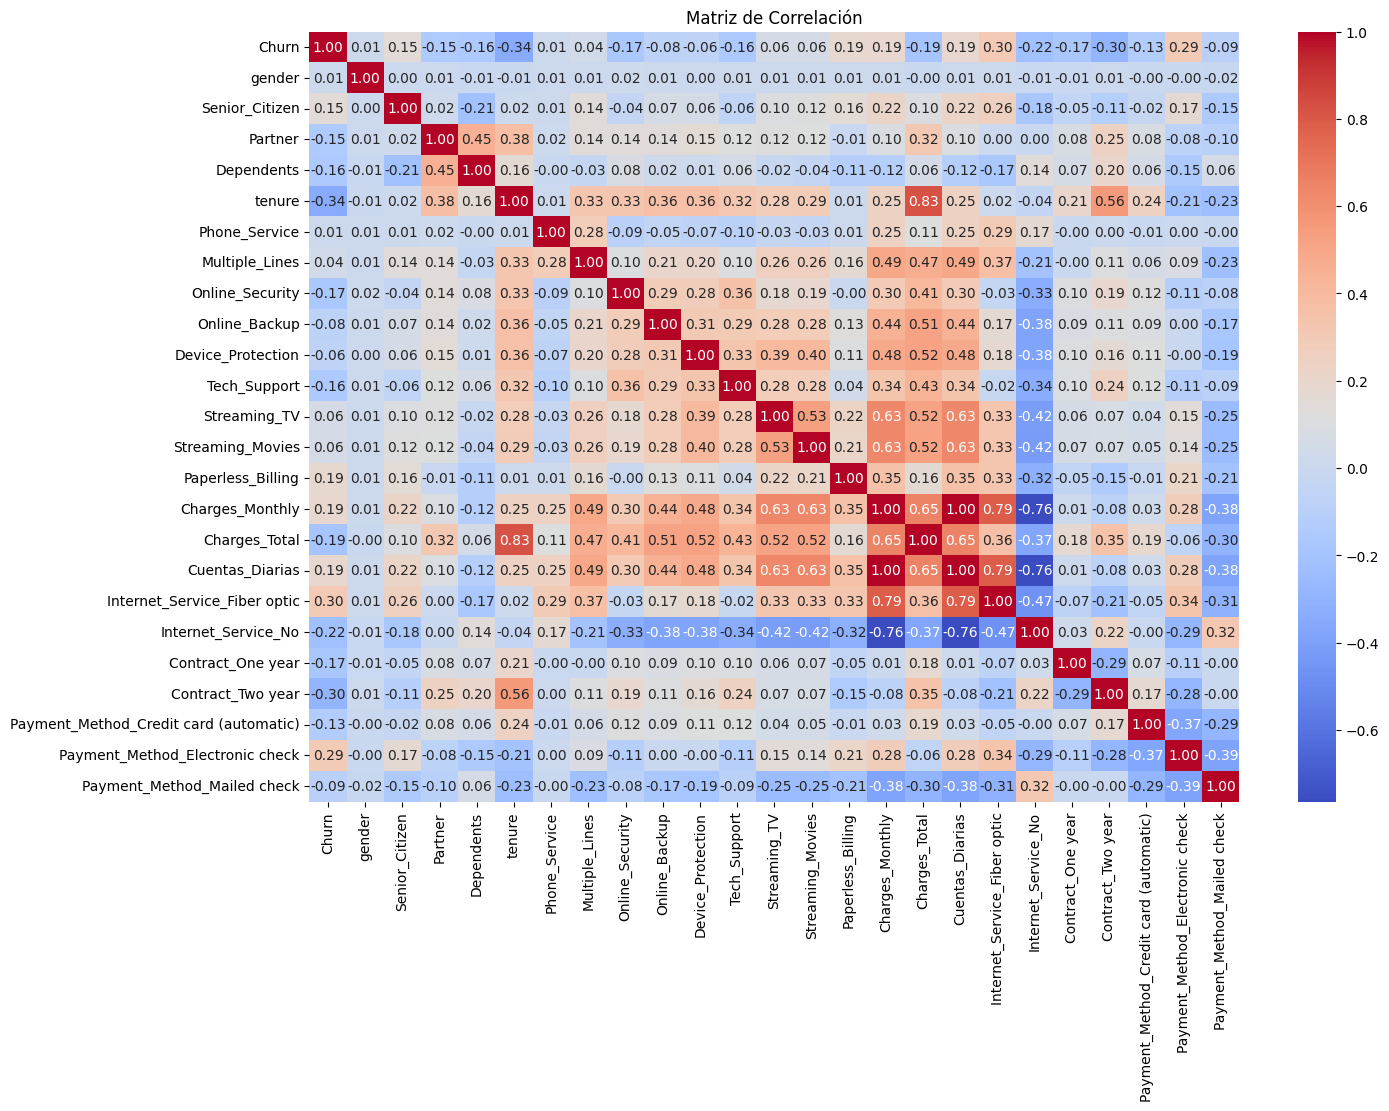

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Forma de los conjuntos de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nForma de los conjuntos de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Forma de los conjuntos de entrenamiento:
X_train: (8636, 24)
y_train: (8636,)

Forma de los conjuntos de prueba:
X_test: (2160, 24)
y_test: (2160,)


### Entrenamiento de Modelos de Clasificación

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train the Logistic Regression model
print("Entrenando modelo de Regresión Logística...")
log_reg_model.fit(X_train, y_train)
print("Modelo de Regresión Logística entrenado.")

# Train the Random Forest model
print("\nEntrenando modelo Random Forest...")
rf_model.fit(X_train, y_train)
print("Modelo Random Forest entrenado.")

Entrenando modelo de Regresión Logística...
Modelo de Regresión Logística entrenado.

Entrenando modelo Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo Random Forest entrenado.


### Evaluación del Rendimiento del Modelo

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# --- Evaluación del Modelo de Regresión Logística ---
print("--- Evaluación del Modelo de Regresión Logística ---")

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)


print(f"Exactitud: {accuracy_log_reg:.4f}")
print(f"Precisión: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")
print("\nMatriz de Confusión:")
display(conf_matrix_log_reg)
print("\nReporte de Clasificación:")
print(class_report_log_reg)


# --- Evaluación del Modelo Random Forest ---
print("\n--- Evaluación del Modelo Random Forest ---")

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)


print(f"Exactitud: {accuracy_rf:.4f}")
print(f"Precisión: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\nMatriz de Confusión:")
display(conf_matrix_rf)
print("\nReporte de Clasificación:")
print(class_report_rf)

--- Evaluación del Modelo de Regresión Logística ---
Exactitud: 0.8153
Precisión: 0.8037
Recall: 0.8343
F1-score: 0.8187

Matriz de Confusión:


array([[860, 220],
       [179, 901]])


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1080
           1       0.80      0.83      0.82      1080

    accuracy                           0.82      2160
   macro avg       0.82      0.82      0.82      2160
weighted avg       0.82      0.82      0.82      2160


--- Evaluación del Modelo Random Forest ---
Exactitud: 0.8491
Precisión: 0.8415
Recall: 0.8602
F1-score: 0.8507

Matriz de Confusión:


array([[905, 175],
       [151, 929]])


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1080
           1       0.84      0.86      0.85      1080

    accuracy                           0.85      2160
   macro avg       0.85      0.85      0.85      2160
weighted avg       0.85      0.85      0.85      2160



### Interpretación de Resultados y Importancia de Variables

In [24]:
import pandas as pd

# --- Importancia de Variables para Regresión Logística ---
print("--- Importancia de Variables para Regresión Logística ---")

# Get the coefficients
coefficients = log_reg_model.coef_[0]

# Create a DataFrame for better visualization
feature_importance_log_reg = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort by absolute coefficient value
feature_importance_log_reg['Abs_Coefficient'] = abs(feature_importance_log_reg['Coefficient'])
feature_importance_log_reg = feature_importance_log_reg.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

display(feature_importance_log_reg)


# --- Importancia de Variables para Random Forest ---
print("\n--- Importancia de Variables para Random Forest ---")

# Get the feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

display(feature_importance_rf)

--- Importancia de Variables para Regresión Logística ---


,Feature,Coefficient
5,Phone_Service,-1.512029
10,Tech_Support,-1.316158
22,Payment_Method_Electronic check,1.304670
7,Online_Security,-1.302849
21,Payment_Method_Credit card (automatic),1.023070
23,Payment_Method_Mailed check,0.932234
8,Online_Backup,-0.879950
9,Device_Protection,-0.793796
6,Multiple_Lines,-0.568744
3,Dependents,-0.534893



--- Importancia de Variables para Random Forest ---


,Feature,Importance
15,Charges_Total,0.128957
4,tenure,0.124607
16,Cuentas_Diarias,0.114918
14,Charges_Monthly,0.108205
22,Payment_Method_Electronic check,0.089108
17,Internet_Service_Fiber optic,0.059080
7,Online_Security,0.043599
10,Tech_Support,0.041160
20,Contract_Two year,0.034801
2,Partner,0.031523


# Informe Final del Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El objetivo de este informe es analizar el problema de la evasión de clientes (Churn) en TelecomX. La evasión de clientes es un desafío importante para las empresas de telecomunicaciones, ya que impacta directamente en los ingresos y el crecimiento. Comprender los factores que contribuyen a que los clientes abandonen el servicio es crucial para desarrollar estrategias efectivas de retención. En este análisis, exploraremos los datos de clientes para identificar patrones y obtener información valiosa sobre el comportamiento de evasión.

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos para el análisis:

*   **Carga de Datos:** Los datos fueron cargados directamente desde la API de Telecom X en formato JSON y convertidos a un DataFrame de Pandas.
*   **Aplanamiento de Columnas Anidadas:** Las columnas con estructuras JSON anidadas ('customer', 'phone', 'internet', 'account') fueron aplanadas en columnas separadas para facilitar el acceso a la información.
*   **Manejo de Inconsistencias:** Se identificaron y trataron inconsistencias en las columnas 'Charges.Total' (espacios en blanco convertidos a numérico y NaNs rellenados con 0) y 'Churn' (valor vacío reemplazado por 'No').
*   **Creación de Nueva Columna:** Se creó la columna 'Cuentas_Diarias' dividiendo 'Charges_Monthly' por 30 para obtener una estimación del costo diario.
*   **Estandarización y Transformación:** Las columnas categóricas binarias ('Yes'/'No') y de servicio ('Yes'/'No'/'No service') fueron convertidas a representaciones numéricas (1s y 0s). También se renombraron algunas columnas para mayor claridad.

## 🔹 Análisis Exploratorio de Datos

Durante la fase de análisis exploratorio, se investigó la distribución de la variable objetivo y su relación con otras características de los clientes.

*   **Distribución de Evasión (Churn):** Se analizó la proporción de clientes que evadieron y los que no, revelando un desbalance de clases con un **{el porcentaje de evasión que obtuviste en la celda c98bd94d}%** de evasión. Puedes incluir el gráfico de barras de la distribución de Churn aquí.
*   **Análisis Descriptivo:** Se calcularon estadísticas descriptivas para las columnas numéricas, proporcionando un resumen de su distribución central y dispersión. Puedes hacer referencia o incluir la tabla de `df.describe()`.
*   **Análisis de Evasión por Variables Categóricas:** Se visualizaron las tasas de evasión para diferentes categorías en variables como género, Senior Citizen, Partner, Dependents, Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies, Contract, Paperless Billing, y Payment Method. **Basado en los gráficos (celda 02839b05), ¿cuáles fueron los hallazgos clave? Por ejemplo: Los clientes con contrato mes a mes tienen una mayor tasa de evasión.** Incluye o referencia los gráficos más relevantes aquí.
*   **Análisis de Evasión por Variables Numéricas:** Se exploró la distribución de variables numéricas como tenure, Charges_Monthly, Charges_Total, y Cuentas_Diarias para clientes que evadieron y los que no. **Basado en los box plots (celda 839e6ad8), ¿cuáles fueron los hallazgos clave? Por ejemplo: Los clientes que evaden tienden a tener menor antigüedad (tenure) y mayores cargos mensuales.** Incluye o referencia los box plots relevantes aquí.

## 🔹 Modelado Predictivo y Evaluación

Se entrenaron modelos de clasificación para predecir la evasión de clientes:

*   **Modelos Entrenados:** Se entrenaron los modelos de Regresión Logística y Random Forest.
*   **Evaluación del Rendimiento:** Los modelos fueron evaluados en un conjunto de prueba utilizando métricas como Exactitud, Precisión, Recall y F1-score, así como la matriz de confusión. **Basado en los resultados de la celda 1e4fa211, compara el rendimiento de ambos modelos. ¿Cuál tuvo un mejor desempeño para predecir la evasión (clase 1)? Considera la Precisión y Recall para la clase 1, además del F1-score.** Puedes incluir las tablas de métricas o hacer referencia a la salida de la celda de evaluación.
*   **Importancia de Variables:** Se analizó la importancia de las variables para cada modelo. **Basado en los resultados de la celda 36003b0d, ¿cuáles fueron las variables más importantes para predecir la evasión según cada modelo? ¿Hay variables que aparecen como importantes en ambos?** Incluye o referencia las tablas de importancia de variables.

## 🔹 Conclusiones e Insights

Basado en el análisis exploratorio y el modelado predictivo, se pueden extraer las siguientes conclusiones e insights clave sobre los factores que más influyen en la evasión:

*   **Factores Clave de Evasión:** **Integra tus hallazgos del EDA (análisis por categorías y numéricas) con la importancia de las variables de los modelos.** ¿Qué características de los clientes (tipo de contrato, servicios adicionales, antigüedad, cargos, método de pago, etc.) parecen ser los predictores más fuertes de evasión? Describe estos factores y explica brevemente por qué crees que son importantes.
*   **Rendimiento del Modelo:** **Resume qué modelo consideras más adecuado para la tarea de predicción de evasión y por qué, basándote en las métricas de evaluación.**
*   **Cualquier otro insight relevante:** [Insertar cualquier otra observación o insight interesante que hayas descubierto durante el proceso].

Estos hallazgos sugieren que la evasión no está impulsada por un único factor, sino por una combinación de características demográficas, servicios contratados y patrones de uso.

## 🔹 Recomendaciones

Con base en los hallazgos de este análisis y el modelado, se recomiendan las siguientes estrategias para reducir la evasión de clientes:

*   **Estrategias Dirigidas:** **Basado en los factores clave de evasión que identificaste en la sección anterior, ¿qué acciones específicas puede tomar TelecomX para retener a los clientes en riesgo?** Por ejemplo, si los clientes con contrato mes a mes y altos cargos mensuales son propensos a evadir, ¿qué tipo de ofertas o comunicación podrían dirigirse a este segmento?
*   **Personalización de Ofertas:** [Basado en otros insights, ¿se pueden ofrecer servicios adicionales (como seguridad online o soporte técnico) a clientes que actualmente no los tienen pero que estos servicios se identificaron como relevantes para la retención?]
*   **Mejora de Servicios/Atención al Cliente:** [Si ciertos métodos de pago o la falta de servicios específicos están asociados a mayor evasión, ¿qué mejoras se pueden hacer en esos aspectos?]
*   [Insertar cualquier otra recomendación estratégica basada en tus insights].

Implementar estas recomendaciones, respaldadas por el análisis de datos, puede ayudar a TelecomX a retener a sus clientes y mejorar su rendimiento general.